In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

In [2]:
f = open("coma_gal.txt", "r")
lines = f.readlines()

index_bounds = (9, 312) # inclusive - exclusive

n_lines = lines[index_bounds[0]:index_bounds[1]]

#for i in range(len(n_lines)):
#    print(i, n_lines[i])

indices = {"NUM": 0, "logD25": 1, "logR25": 2, "BT": 3, "Vhelio": 4}
col_indices = [3, 73, 81, 86, 93]#[3, 6, 45, 61, 73, 81, 86, 93]
# don't need the name, nor the angular position, nor type
def parse_lines(lines):
    #data = np.zeros((len(lines), len(col_indices)))
    data = [[0 for j in col_indices] for i in lines ]
    for i in range(len(lines)):
        l = lines[i]
        for j in range(len(col_indices)):
            c = col_indices[j]
            for k in range(c, len(l)):
                if k > c and (l[k]==" " or k==len(l)-1) :
                    #print(f"{c}yeet", l[c:k])
                    #data[i][j] = float(l[c:k])
                    try :
                        #if l[c:k] == " ":
                        #    raise Exception
                        data[i][j] = float(l[c:k])
                    except:
                        cce = 0
                        data[i][j] = None
                    break
    return data
data = parse_lines(n_lines)
print(data)
#print(np.zeros((5, 2)))

print(data[0][indices["Vhelio"]])
print(np.transpose(data))

#indices = {"NUM": 0, "logD25": 1, "logR25": 2, "BT": 3, "Vhelio": 4}
NUM, logD25, logR25, BT_mag, Vhelio = np.transpose(data)
# VHelio values at 0 should aren't real, should be None

Vhelio_valid = []
BT_prevalid = []
for i in range(len(Vhelio)):
    if Vhelio[i] == 0:
        Vhelio[i] = None
        continue
    # only consider recession velocity and magnitude data, if recession velocity for galaxy
    # is given. Otherwise we can't even determine if they are part of the cluster
    Vhelio_valid.append(Vhelio[i])
    BT_prevalid.append(BT_mag[i])

print(Vhelio)



[[1.0, None, None, 18.75, 8159.0], [2.0, 0.74, 0.13, 16.75, 0], [3.0, None, None, 17.76, 6061.0], [4.0, 0.62, 0.26, 15.36, 7460.0], [5.0, 0.88, 0.08, 15.86, 7738.0], [6.0, None, None, 18.31, 5882.0], [7.0, None, None, 19.7, 49174.0], [8.0, None, None, 17.44, 8539.0], [9.0, 0.63, 0.07, 16.65, 5968.0], [0.0, 0.68, 0.1, 16.29, 5891.0], [1.0, 0.92, 0.54, 16.2, 5097.0], [2.0, 0.5, 0.0, 16.41, 5050.0], [3.0, None, None, 17.29, 5779.0], [4.0, 0.5, 0.08, 17.14, 5589.0], [5.0, 0.91, 0.04, 14.4, 7608.0], [6.0, 0.84, 0.18, 16.16, 0], [7.0, None, None, 19.11, 47535.0], [8.0, None, None, 19.43, 6635.0], [9.0, 0.77, 0.45, 16.58, 8223.0], [0.0, 0.77, 0.42, 16.72, 7513.0], [1.0, None, None, 18.39, 33849.0], [2.0, 0.7, 0.11, 16.12, 5577.0], [3.0, None, None, 17.5, 7579.0], [4.0, 1.05, 0.04, 14.0, 7879.0], [5.0, None, None, 18.05, 5876.0], [6.0, None, None, 18.31, 17437.0], [7.0, 0.74, 0.19, 15.76, 7486.0], [8.0, None, None, 19.47, 8043.0], [9.0, 0.74, 0.06, 15.16, 5547.0], [0.0, 0.78, 0.14, 15.56, 7144

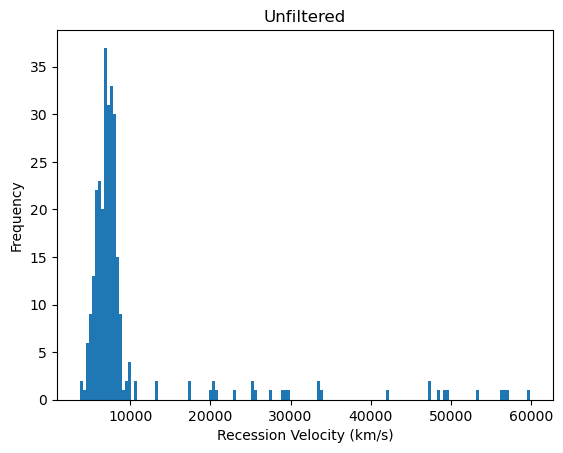

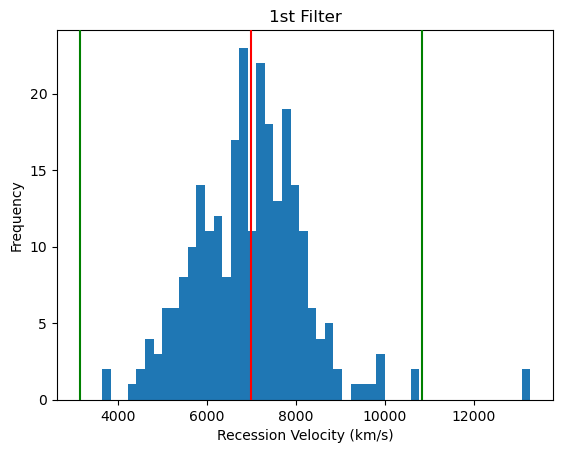

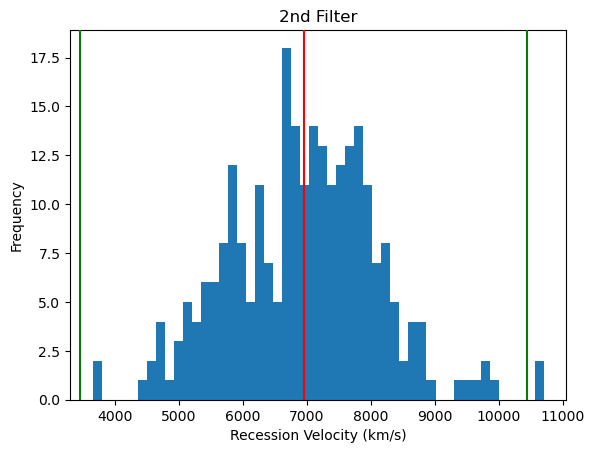

In [3]:
plt.hist(Vhelio_valid, bins = 150)
plt.xlabel("Recession Velocity (km/s)")
plt.ylabel("Frequency")
plt.title("Unfiltered")

plt.savefig("figs/identify_0.png")
plt.show()


upper_lim = 15000 # rough estimate to eliminate clear outliers
Vhelio_sift1 = []
BT_sift1 = []
for i in range(len(Vhelio_valid)):
    if Vhelio_valid[i] < upper_lim:
        Vhelio_sift1.append(Vhelio_valid[i])
        BT_sift1.append(BT_prevalid[i])

Vmean_1 = np.mean(Vhelio_sift1)
Vstd_1 = np.std(Vhelio_sift1)


plt.hist(Vhelio_sift1, bins=50)
plt.axvline(Vmean_1, c="red", zorder=5)
plt.axvline(Vmean_1+3*Vstd_1, c="g", zorder=5)
plt.axvline(Vmean_1-3*Vstd_1, c="g", zorder=5)
plt.xlabel("Recession Velocity (km/s)")
plt.ylabel("Frequency")
plt.title("1st Filter")

plt.savefig("figs/identify_1.png")
plt.show()

Vhelio_sift2 = []
BT_sift2 = []
for i in range(len(Vhelio_sift1)):
    if (Vhelio_sift1[i] > Vmean_1-3*Vstd_1) and (Vhelio_sift1[i] < Vmean_1+3*Vstd_1) :
        Vhelio_sift2.append(Vhelio_sift1[i])
        BT_sift2.append(BT_sift1[i])

Vmean_2 = np.mean(Vhelio_sift2)
Vstd_2 = np.std(Vhelio_sift2)
plt.hist(Vhelio_sift2, bins=50)
plt.axvline(Vmean_2, c="red", zorder=5)
plt.axvline(Vmean_2+3*Vstd_2, c="g", zorder=5)
plt.axvline(Vmean_2-3*Vstd_2, c="g", zorder=5)
plt.xlabel("Recession Velocity (km/s)")
plt.ylabel("Frequency")
plt.title("2nd Filter")

plt.savefig("figs/identify_2.png")
plt.show()

In [9]:
print(f"mean recession velocity {Vmean_2:.3} km/s")
print(f"velocity dispersion {Vstd_2:.3} km/s")

print(csts.G)
print(csts.parsec)

mean recession velocity 6.94e+03 km/s
velocity dispersion 1.16e+03 km/s
6.6743e-11
3.085677581491367e+16


In [12]:
R = 3  * 10**6 * csts.parsec # 3 Mpc in m
M_vir = R*Vstd_2**2 / csts.G

print(f"Virial mass {M_vir} kg")

Virial mass 1.8812428719312665e+39 kg
